In [1]:
# average description work count f21

from db import DB

with DB('../gen.db') as db:
    res = db.execute('''
        SELECT AVG(word_count) as average_word_count
        FROM (
            SELECT LENGTH(description) - LENGTH(REPLACE(description, ' ', '')) + 1 as word_count
            FROM Courses
        ) as subquery;
    ''')

    print(res)

[(71.81008717310087,)]


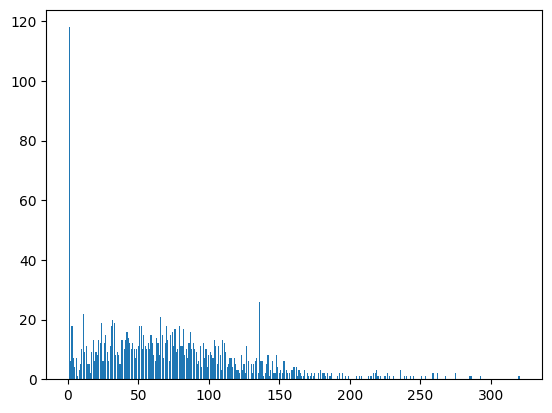

In [3]:
# dist of word count f21

import matplotlib.pyplot as plt
import numpy as np 

with DB('../gen.db') as db:
    res = db.execute('''
        SELECT LENGTH(description) - LENGTH(REPLACE(description, ' ', '')) + 1 AS word_count,
            COUNT(*) as frequency
        FROM Courses
        GROUP BY word_count
        ORDER BY word_count
    ''')

    word_counts = [row[0] for row in res]
    frequencies = [row[1] for row in res]

    plt.bar(word_counts, frequencies)
    plt.show()

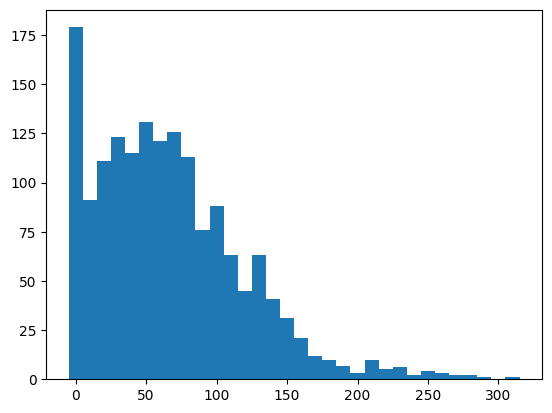

In [8]:
# larger bucket histogram

with DB('../gen.db') as db:
    res = db.execute('''
        SELECT ROUND((LENGTH(description) - LENGTH(REPLACE(description, ' ', ''))) / 10) * 10 AS word_count_range,
            COUNT(*) as frequency
        FROM Courses
        GROUP BY word_count_range
        ORDER BY word_count_range;
    ''')

    word_count_ranges = [row[0] for row in res]
    frequencies = [row[1] for row in res]

    plt.bar(word_count_ranges, frequencies, width=10)
    plt.show()

In [9]:
with DB('../gen.db') as db:
    res = db.execute('''
        SELECT *
        FROM Courses
        WHERE LENGTH(description) - LENGTH(REPLACE(description, ' ', '')) + 1 = 1;
    ''')

    for r in res:
        pass